# Import

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,UpSampling2D, Input, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Load Data

In [4]:
def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(128,128), cmap='gray')
    plt.show()

In [5]:
def load_image(dir1,dir2):
  images = []
  images1 = sorted(os.listdir(dir1))
  images2 = sorted(os.listdir(dir2))
  for im in images1:
      img = image.load_img(dir1+'/'+ im, target_size=(128,128), color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  for im in images2:
      img = image.load_img(dir2+'/'+ im, target_size=(128,128), color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  return np.array(images)

In [6]:
dir1 = 'brain_tumor/original/no'
dir2 = 'brain_tumor/original/yes'

In [7]:
images = load_image(dir1, dir2)

In [8]:
'''def load_df(dir1,dir2,dir3,dir4,dir5,dir6,dir7,dir8):
  images = []
  images1 = sorted(os.listdir(dir1))
  images2 = sorted(os.listdir(dir2))
  images3 = sorted(os.listdir(dir3))
  images4 = sorted(os.listdir(dir4))
  images5 = sorted(os.listdir(dir5))
  images6 = sorted(os.listdir(dir6))
  images7 = sorted(os.listdir(dir7))
  images8 = sorted(os.listdir(dir8))
  imageshape = (128,128)
  for im in images1:
      img = image.load_img(dir1+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  for im in images2:
      img = image.load_img(dir2+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  for im in images3:
      img = image.load_img(dir3+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)   
  for im in images4:
      img = image.load_img(dir4+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  for im in images5:
      img = image.load_img(dir5+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  for im in images6:
      img = image.load_img(dir6+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  for im in images7:
      img = image.load_img(dir7+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)   
  for im in images8:
      img = image.load_img(dir8+'/'+ im, target_size=imageshape, color_mode= 'grayscale')
      img = image.img_to_array(img)
      img = img/255
      images.append(img)
  return np.array(images)'''

"def load_df(dir1,dir2,dir3,dir4,dir5,dir6,dir7,dir8):\n  images = []\n  images1 = sorted(os.listdir(dir1))\n  images2 = sorted(os.listdir(dir2))\n  images3 = sorted(os.listdir(dir3))\n  images4 = sorted(os.listdir(dir4))\n  images5 = sorted(os.listdir(dir5))\n  images6 = sorted(os.listdir(dir6))\n  images7 = sorted(os.listdir(dir7))\n  images8 = sorted(os.listdir(dir8))\n  imageshape = (128,128)\n  for im in images1:\n      img = image.load_img(dir1+'/'+ im, target_size=imageshape, color_mode= 'grayscale')\n      img = image.img_to_array(img)\n      img = img/255\n      images.append(img)\n  for im in images2:\n      img = image.load_img(dir2+'/'+ im, target_size=imageshape, color_mode= 'grayscale')\n      img = image.img_to_array(img)\n      img = img/255\n      images.append(img)\n  for im in images3:\n      img = image.load_img(dir3+'/'+ im, target_size=imageshape, color_mode= 'grayscale')\n      img = image.img_to_array(img)\n      img = img/255\n      images.append(img)   \n  for

In [9]:
'''dir1 = 'brain_tumor/training/glioma'
dir2 = 'brain_tumor/training/meningioma'
dir3 = 'brain_tumor/training/pituitary'
dir4 = 'brain_tumor/training/notumor'
dir5 = 'brain_tumor/testing/glioma'
dir6 = 'brain_tumor/testing/meningioma'
dir7 = 'brain_tumor/testing/pituitary'
dir8 = 'brain_tumor/testing/notumor'''

"dir1 = 'brain_tumor/training/glioma'\ndir2 = 'brain_tumor/training/meningioma'\ndir3 = 'brain_tumor/training/pituitary'\ndir4 = 'brain_tumor/training/notumor'\ndir5 = 'brain_tumor/testing/glioma'\ndir6 = 'brain_tumor/testing/meningioma'\ndir7 = 'brain_tumor/testing/pituitary'\ndir8 = 'brain_tumor/testing/notumor"

In [10]:
#images = load_df(dir1, dir2, dir3, dir4, dir5, dir6, dir7, dir8)

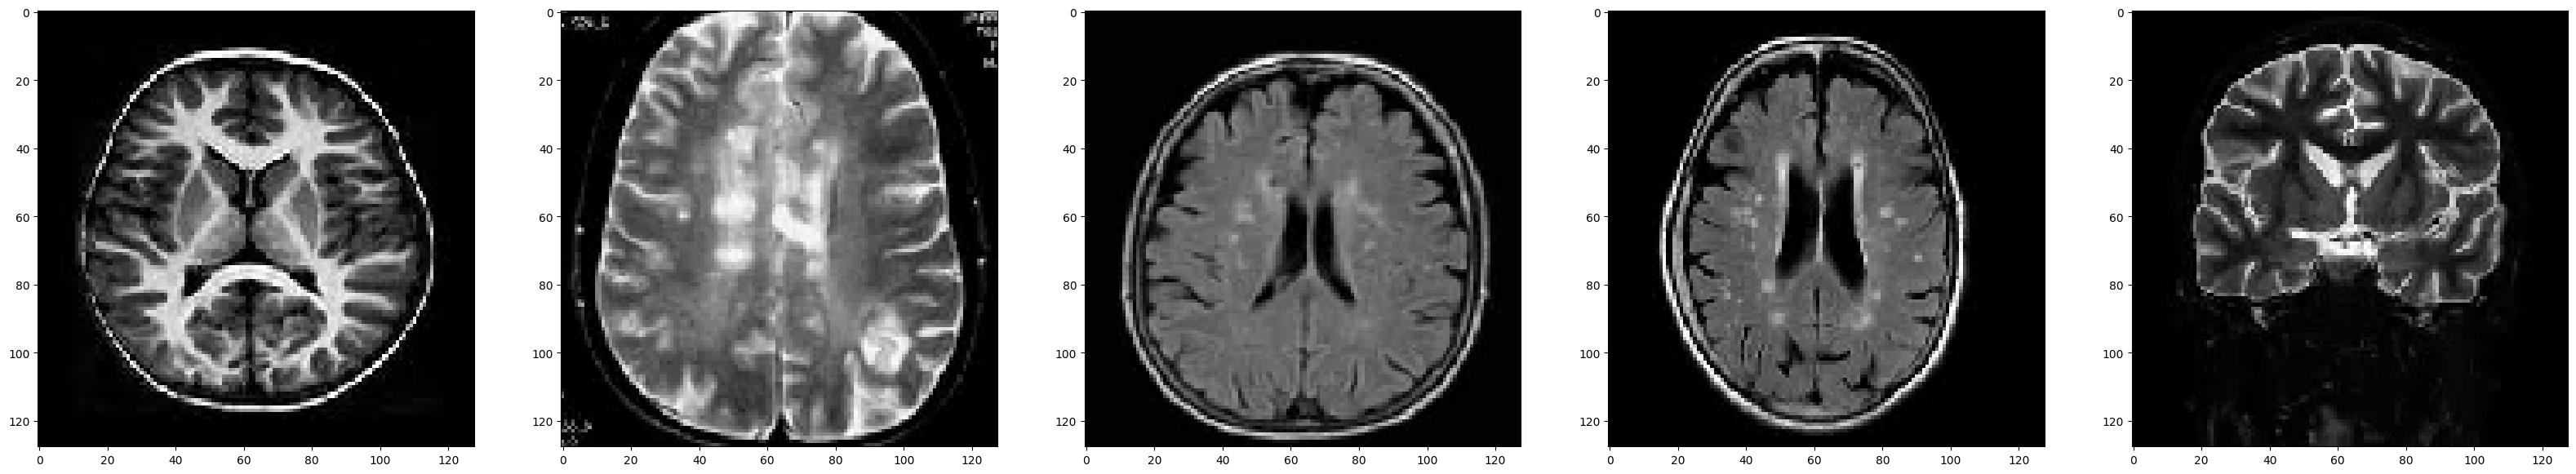

In [11]:
show_img(images)

In [12]:
len(images)

253

In [13]:
np.save("brain_tumor/images", images)

# Data Split

In [14]:
X_train, X_test = train_test_split(images,
    test_size=0.1, shuffle = True, random_state = 42)

X_train, X_val = train_test_split(X_train, 
    test_size=0.111, random_state= 42)

In [15]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(X_val.shape))

X_train shape: (201, 128, 128, 1)
X_test shape: (26, 128, 128, 1)
X_val shape: (26, 128, 128, 1)


In [16]:
np.save("brain_tumor/X_train", X_train)
np.save("brain_tumor/X_test", X_test)
np.save("brain_tumor/X_val", X_val)

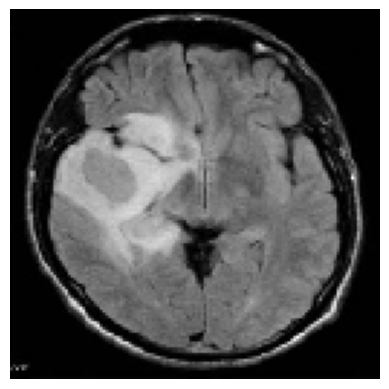

In [17]:
i = 1
for img in X_train:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/training/train-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1


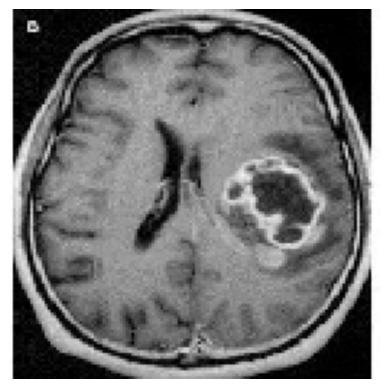

In [18]:
i = 1
for img in X_test:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/test/test-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1

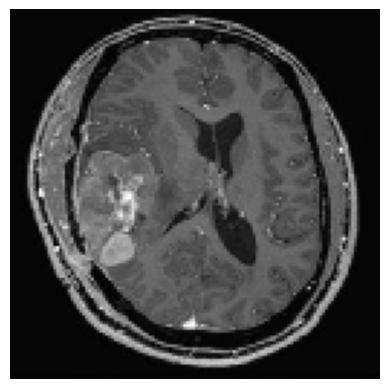

In [19]:
i = 1
for img in X_val:
    plt.imshow(img)
    plt.set_cmap('gray')
    plt.axis('off')
    plt.savefig('brain_tumor/validation/val-'+str(i)+'.png', bbox_inches='tight', pad_inches=0)
    i = i +1